음성의 주파수로 성별을 구별 프로그램

입력과 결과값이 주어진 데이터 셋으로 지도학습을 한다

In [1]:
import pandas as pd                       # 데이터 처리를 위한 라이브러리
train = pd.read_csv('input/voice.csv')     # 훈련데이터를 불러와서 train변수에 저장(75%)
test = pd.read_csv('input/tvoice.csv')     # 테스트데이터를 불러와서 test변수에 저장(25%)

In [2]:
train.head(2373) # 22개의 주파수 feature와 개수를 확인

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,sex
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female,2
2369,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female,2
2370,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female,2
2371,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female,2


In [3]:
train.info()           #훈련,테스트 데이터의 정보를 확인
test.info()
train.isnull().sum()
test.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2373 non-null   float64
 1   sd        2373 non-null   float64
 2   median    2373 non-null   float64
 3   Q25       2373 non-null   float64
 4   Q75       2373 non-null   float64
 5   IQR       2373 non-null   float64
 6   skew      2373 non-null   float64
 7   kurt      2373 non-null   float64
 8   sp.ent    2373 non-null   float64
 9   sfm       2373 non-null   float64
 10  mode      2373 non-null   float64
 11  centroid  2373 non-null   float64
 12  meanfun   2373 non-null   float64
 13  minfun    2373 non-null   float64
 14  maxfun    2373 non-null   float64
 15  meandom   2373 non-null   float64
 16  mindom    2373 non-null   float64
 17  maxdom    2373 non-null   float64
 18  dfrange   2373 non-null   float64
 19  modindx   2373 non-null   float64
 20  label     2373 non-null   obje

meanfreq      0
sd            0
median        0
Q25           0
Q75           0
IQR           0
skew          0
kurt          0
sp.ent        0
sfm           0
mode          0
centroid      0
meanfun       0
minfun        0
maxfun        0
meandom       0
mindom        0
maxdom        0
dfrange       0
modindx       0
label         0
sex         794
dtype: int64

In [4]:
import matplotlib.pyplot as plt  # 그래픽으로 시각화하기 위한 라이브러리
%matplotlib inline 
import seaborn as sns            # 데이터분포를 보기 위한 라이브러리
sns.set()

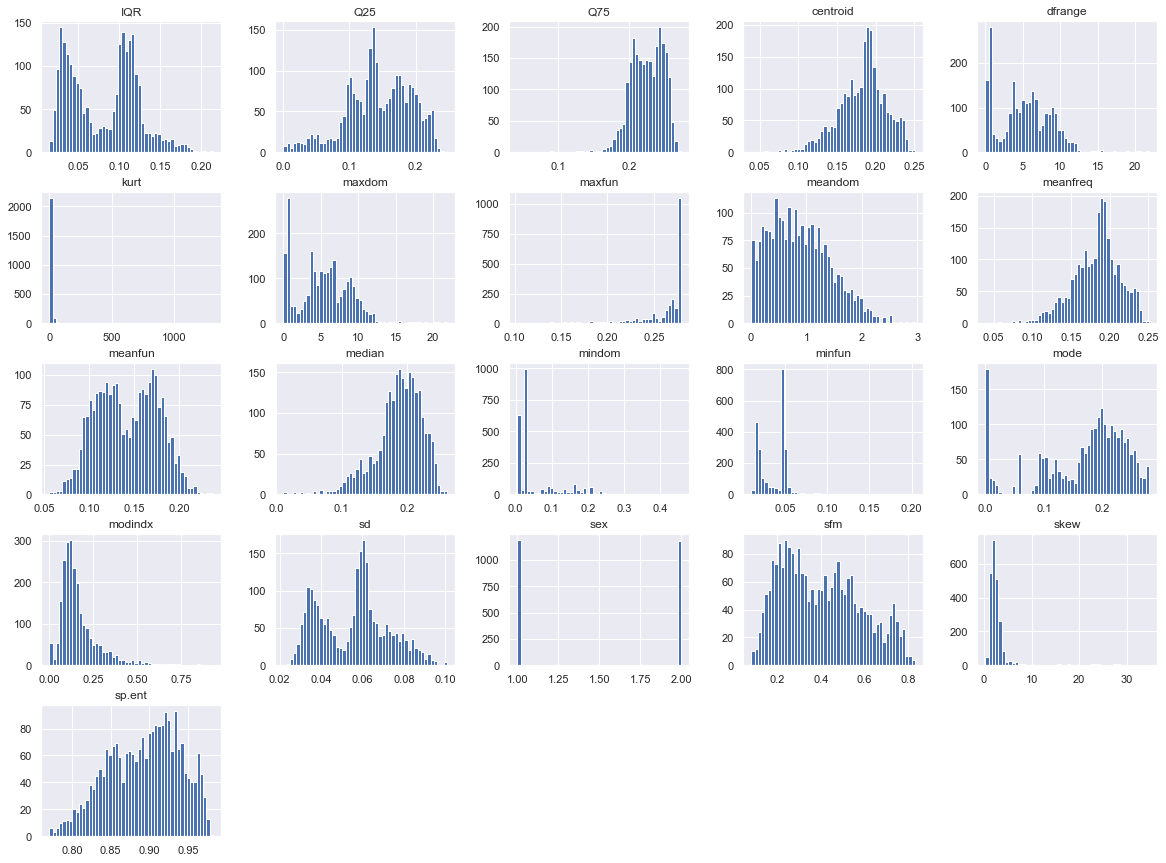

In [5]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

각 종류별로의 주파수의 분포도 파악(분포도는 성별구분이 없어 의미가 없다.)

성별의 비율은 50:50

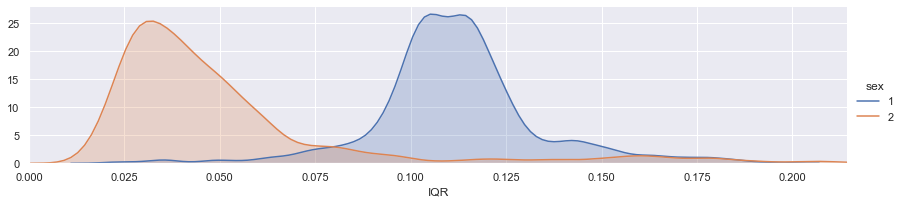

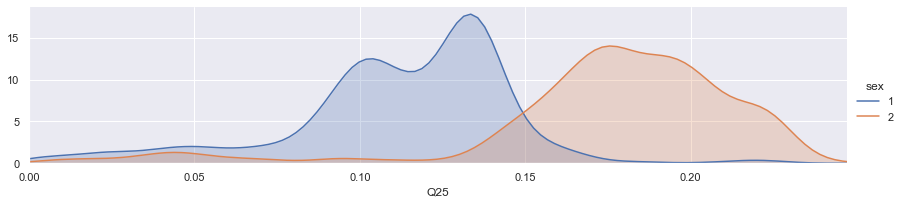

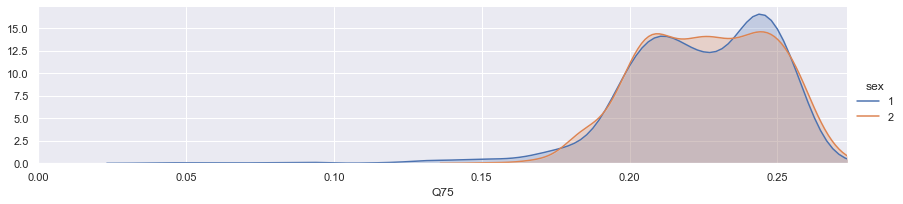

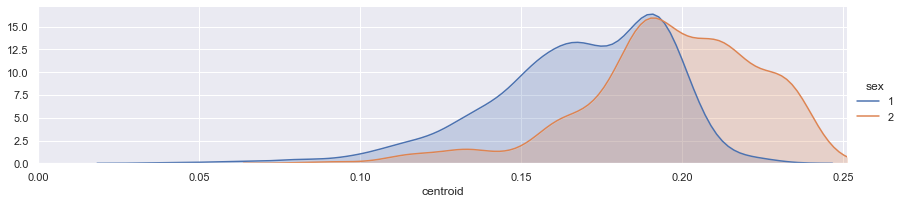

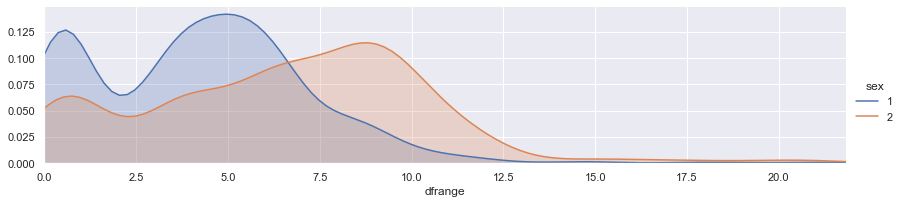

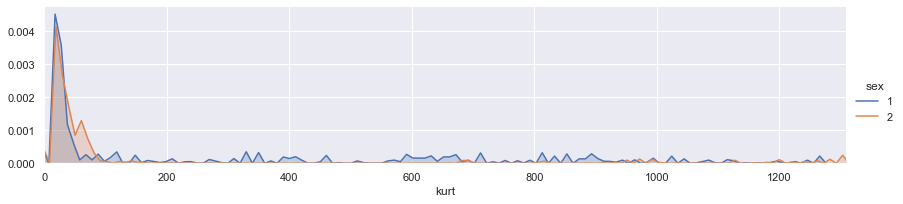

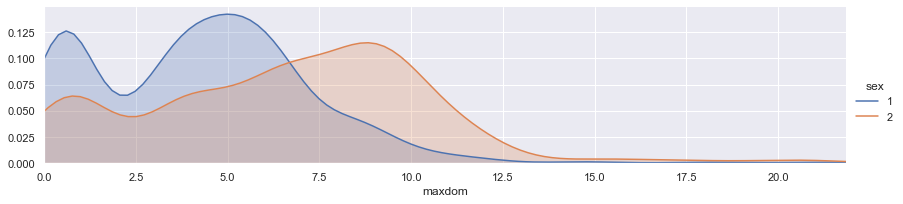

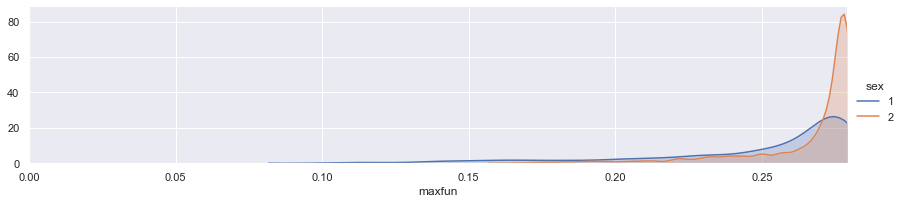

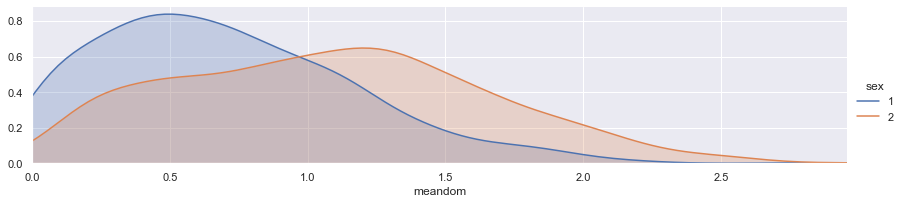

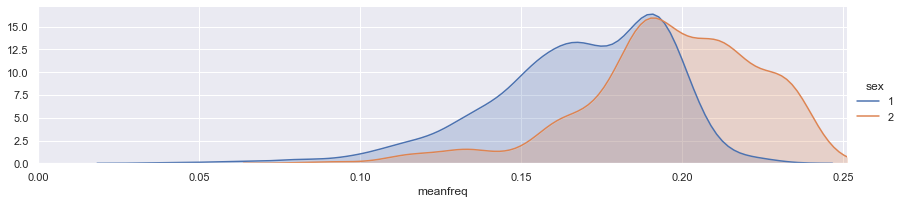

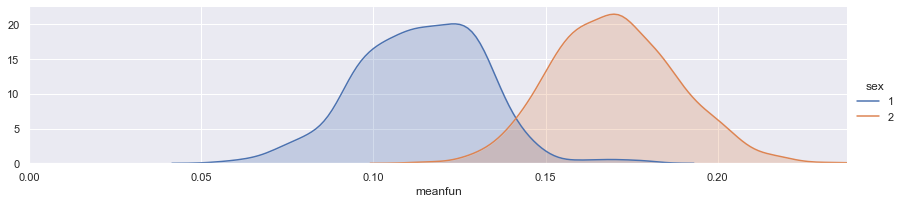

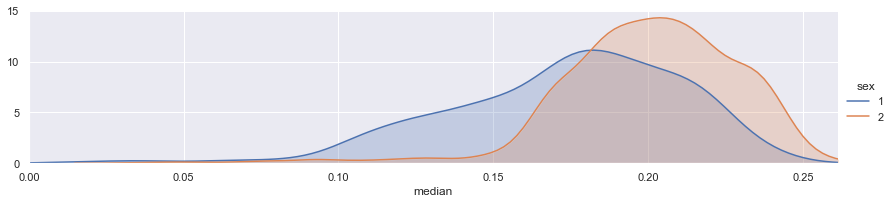

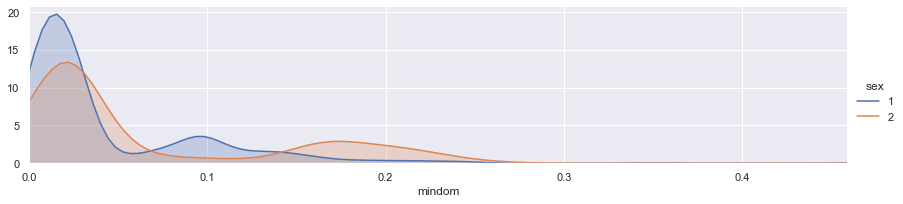

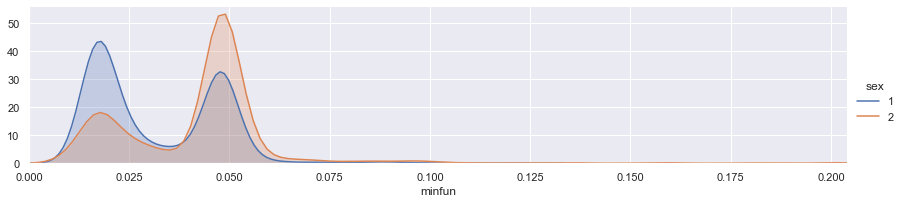

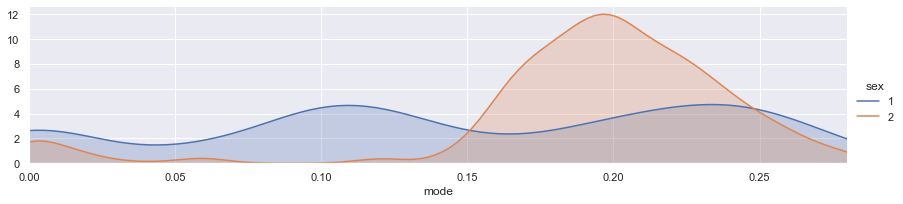

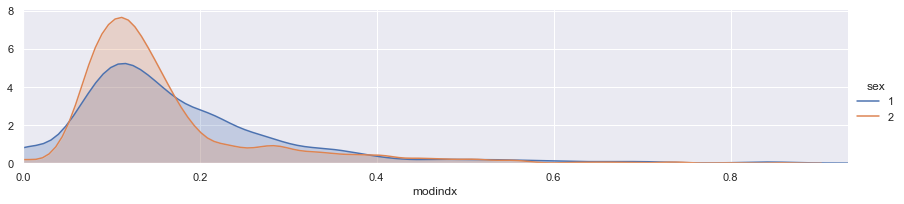

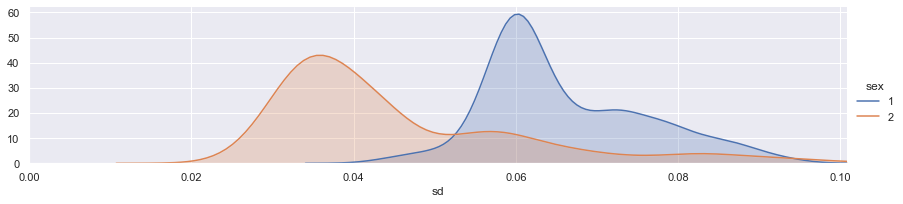

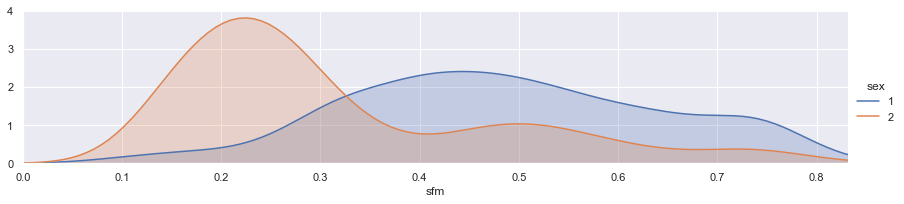

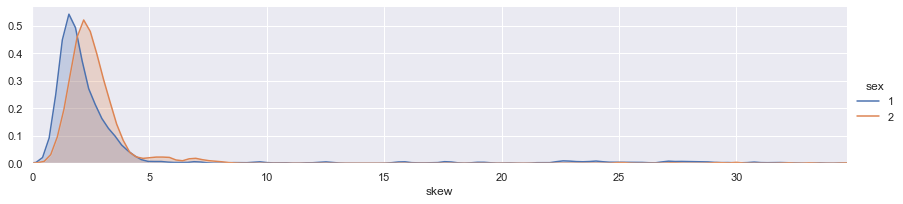

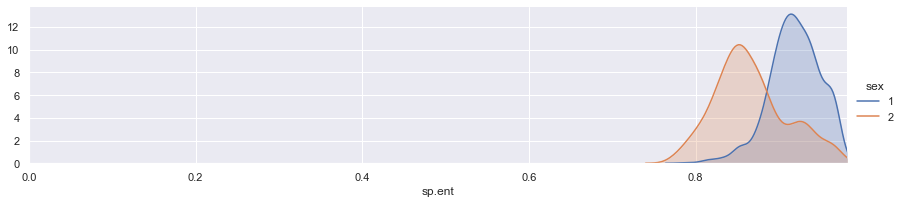

In [6]:
facet = sns.FacetGrid(train, hue="sex",aspect=4) # 그래프를 이용하여 성별에 따른 주파수를 확인함수
facet.map(sns.kdeplot,'IQR',shade= True) 
facet.set(xlim=(0, train['IQR'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'Q25',shade= True) 
facet.set(xlim=(0, train['Q25'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'Q75',shade= True) 
facet.set(xlim=(0, train['Q75'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'centroid',shade= True) 
facet.set(xlim=(0, train['centroid'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'dfrange',shade= True) 
facet.set(xlim=(0, train['dfrange'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'kurt',shade= True) 
facet.set(xlim=(0, train['kurt'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'maxdom',shade= True) 
facet.set(xlim=(0, train['maxdom'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'maxfun',shade= True) 
facet.set(xlim=(0, train['maxfun'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'meandom',shade= True) 
facet.set(xlim=(0, train['meandom'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'meanfreq',shade= True) 
facet.set(xlim=(0, train['meanfreq'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'meanfun',shade= True) 
facet.set(xlim=(0, train['meanfun'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'median',shade= True) 
facet.set(xlim=(0, train['median'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'mindom',shade= True) 
facet.set(xlim=(0, train['mindom'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'minfun',shade= True) 
facet.set(xlim=(0, train['minfun'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'mode',shade= True) 
facet.set(xlim=(0, train['mode'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'modindx',shade= True) 
facet.set(xlim=(0, train['modindx'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'sd',shade= True) 
facet.set(xlim=(0, train['sd'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'sfm',shade= True) 
facet.set(xlim=(0, train['sfm'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'skew',shade= True) 
facet.set(xlim=(0, train['skew'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'sp.ent',shade= True) 
facet.set(xlim=(0, train['sp.ent'].max())) 
facet.add_legend() 
plt.show()

모든 feature의 남자와 여자의 분포도를 파악한다.
(22가지 매개변수 모두 종류만 다른 주파수들인데 관계를 파악하기에는 과학지식이 너무 깊게 필요하기 때문에
보기에 가장 구분되있는 것을 feature로 선정한다)

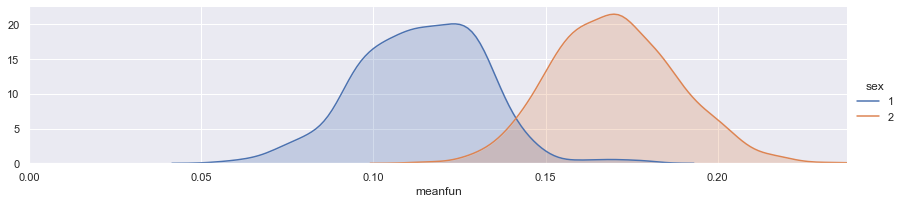

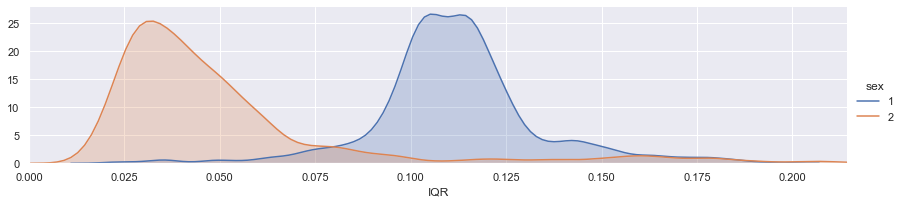

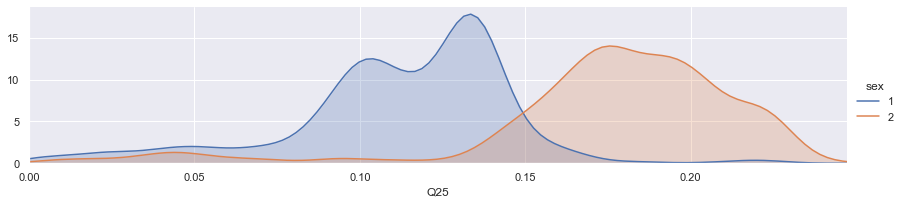

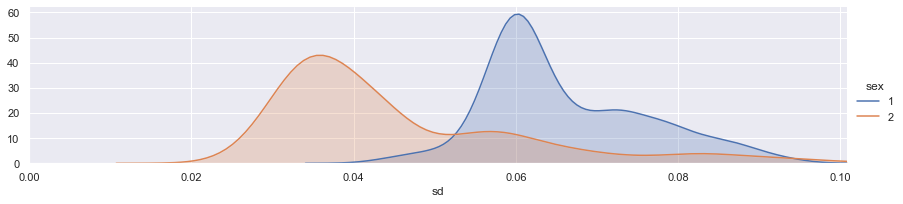

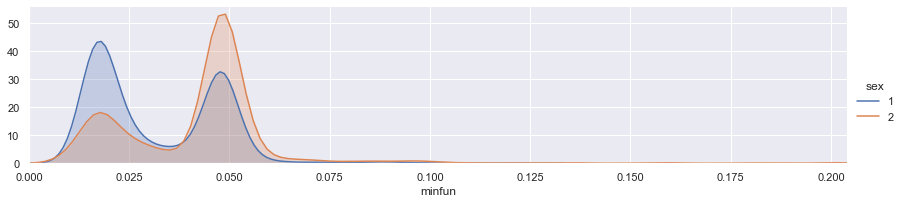

In [7]:
facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'meanfun',shade= True) 
facet.set(xlim=(0, train['meanfun'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'IQR',shade= True) 
facet.set(xlim=(0, train['IQR'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'Q25',shade= True) 
facet.set(xlim=(0, train['Q25'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'sd',shade= True) 
facet.set(xlim=(0, train['sd'].max())) 
facet.add_legend() 

facet = sns.FacetGrid(train, hue="sex",aspect=4) 
facet.map(sns.kdeplot,'minfun',shade= True) 
facet.set(xlim=(0, train['minfun'].max())) 
facet.add_legend() 

plt.show()

가장 잘 구분되어있는 meanfun, IQR, Q25, sd, minfun으로 feature 5개를 선정하였다.

눈으로 보기에는 정확하지만 실제로 확인하기 위해 다이어그램의 정보로 확인한다.

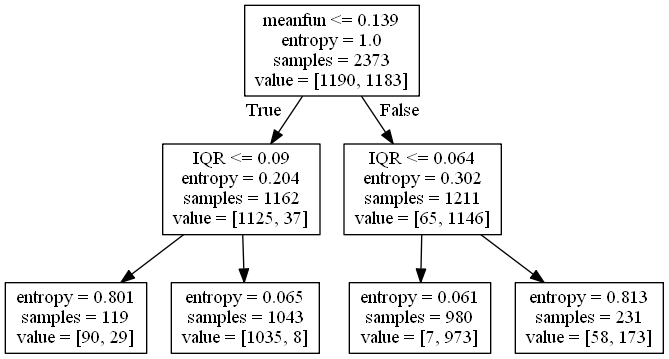

In [8]:
import io
import pydot
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from IPython.core.display import Image

feature_names = ["meanfun", "IQR"]           # 가장 중요한 퓨처 2가지 선정
dfC = train[feature_names].copy()
dfd = train["sex"].copy()

model = DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=1).fit(dfC, dfd)

command_buf = io.StringIO()
export_graphviz(model, out_file=command_buf, feature_names=['meanfun','IQR'])
graph = pydot.graph_from_dot_data(command_buf.getvalue())[0]
image = graph.create_png()
Image(image)

이 5개의 feature들 중에서도 meanfun값이 140hz가 넘으면 왠만해서는 여자 목소리이지만, 140hz가 넘지 않는 여자가 있을 수도 있기 때문에 
140hz이하 중에서 IQR값이 0.07보다 작으면 여자로 분류하여 주기 때문에 정확도를 높일 수 있다.

추가적으로 나머지 3개의 feature를 하면 더욱 더 정확한 분류모델의 feature가 된다.

In [9]:
features = ["meanfun","IQR", "Q25", "sd","minfun"]
dfX = train[features].copy()                           #훈련데이터 퓨쳐
dfy = train["sex"].copy()                              #훈련데이터 키
dfA = test[features].copy()                            #테스트데이터 퓨쳐
dfb = test["sex"].copy()                               #테이스데이터 키

dfX.head()

,meanfun,IQR,Q25,sd,minfun
0,0.084279,0.075122,0.015071,0.064241,0.015702
1,0.107937,0.073252,0.019414,0.067310,0.015826
2,0.098706,0.123207,0.008701,0.083829,0.015656
3,0.088965,0.111374,0.096582,0.072111,0.017798
4,0.106398,0.127325,0.078720,0.079146,0.016931


feature들을 따로 모아서 변수들에 저장

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=dfX, y=dfy)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

임시로 LinearRegreesion모델을 이용해 값 중간점검

In [20]:
test['sex']=lr.predict(dfA[features])   # 훈련데이터로 테스트데이터의 성별을 예측
print(test['sex'])
value = test['sex'][135]                # 136번째 사람
if value> 1.5:                          # 값이 1.5이하이면 반내림으로 남자로 판단
    s='여자'
else:
    s='남자'
print(s)

0      1.201276
1      1.242010
2      1.262468
3      1.172416
4      1.062074
         ...   
789    2.163256
790    2.059194
791    1.993274
792    1.912724
793    1.853796
Name: sex, Length: 794, dtype: float64
남자


test테이터의 0부터 394번까지는 남자이고, 395번부터 793번까지는 여자이다.

값을 확인해보았을때 
초반은 1.0부터 1.3의 값이므로, 즉 남자임을 뜻한다.
후반은 1.8부터 2.2의 값이므로, 즉 여자임을 알 수 있다.
예시로 135번째를 확인하니 남자임을 알 수 있다.

In [21]:
from sklearn.tree import DecisionTreeClassifier     # 디시전 트리
from sklearn.neighbors import KNeighborsClassifier  # K-NN
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트
from sklearn.svm import SVC                         # SVM
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score 
import numpy as np
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2373 entries, 0 to 2372
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  2373 non-null   float64
 1   sd        2373 non-null   float64
 2   median    2373 non-null   float64
 3   Q25       2373 non-null   float64
 4   Q75       2373 non-null   float64
 5   IQR       2373 non-null   float64
 6   skew      2373 non-null   float64
 7   kurt      2373 non-null   float64
 8   sp.ent    2373 non-null   float64
 9   sfm       2373 non-null   float64
 10  mode      2373 non-null   float64
 11  centroid  2373 non-null   float64
 12  meanfun   2373 non-null   float64
 13  minfun    2373 non-null   float64
 14  maxfun    2373 non-null   float64
 15  meandom   2373 non-null   float64
 16  mindom    2373 non-null   float64
 17  maxdom    2373 non-null   float64
 18  dfrange   2373 non-null   float64
 19  modindx   2373 non-null   float64
 20  label     2373 non-null   obje

성능 평가를 위해 sklearn이 제공하는 라이브러리 불러오기
디시전트리, K-NN, 랜덤포레스트, SVM 포함

In [22]:
# DecisionTree
clf = DecisionTreeClassifier() 
scoring = 'accuracy'
score = cross_val_score(clf, dfX, dfy, cv=k_fold, n_jobs=1, scoring=scoring) 
print(score)

# decision tree Score 
round(np.mean(score)*100, 2)


[0.95378151 0.96638655 0.9789916  0.9535865  0.96202532 0.9535865
 0.96202532 0.97890295 0.96202532 0.95780591]


96.29

In [23]:
#(21) K-NN
clf = KNeighborsClassifier(n_neighbors=13) 
scoring = 'accuracy'
score = cross_val_score(clf, dfX, dfy, cv=k_fold, n_jobs=1, scoring=scoring) 
print(score)

# K-NN Score 
round(np.mean(score)*100, 2)

[0.96638655 0.98739496 0.98319328 0.98312236 0.97890295 0.96624473
 0.97468354 0.98312236 0.97890295 0.98312236]


97.85

In [24]:
#(22) RandomForest
clf = RandomForestClassifier(n_estimators=13) 
scoring = 'accuracy'
score = cross_val_score(clf, dfX, dfy, cv=k_fold, n_jobs=1, scoring=scoring) 
print(score)

# RandomForest Score 
round(np.mean(score)*100, 2)

[0.98319328 0.98739496 0.99579832 0.97046414 0.97046414 0.95780591
 0.97468354 0.97890295 0.97046414 0.97046414]


97.6

In [25]:
#(23) SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, dfX, dfy, cv=k_fold, n_jobs=1, scoring=scoring) 
print(score)

# SVC Score 
round(np.mean(score)*100, 2)

[0.96638655 0.98319328 0.9789916  0.98312236 0.97468354 0.9535865
 0.97046414 0.97046414 0.97046414 0.97468354]


97.26

거의 모든 모델이 96,97퍼로 높은 정확도를 보였다.
이 중에 SVM모델을 학습시킨다.

In [26]:
clf = SVC()
clf.fit(dfX, dfy) 
prediction = clf.predict(dfA)
test['sex']=clf.predict(dfA[features])
print(test['sex'])

0      1
1      1
2      1
3      1
4      1
      ..
789    2
790    2
791    2
792    2
793    2
Name: sex, Length: 794, dtype: int64


아까 LinearRegression는 소수점을 보이며 불안전한 모습이였는데,
SVM모델을 적용하니 1과 2로 정확하게 나뉘게 되었다.

이번에는 테스트 데이터가 아닌 직접 녹음하여 측정한 목소리로 성별을 확인한다

0번째가 내 목소리, 1번째가 여자강의자 목소리, 이번에는 if문으로 1이면 남자 2면 여자라고 문자로 표현하게 설정한다.

In [28]:
check = pd.read_csv('input/check.csv')  #녹음한 파일의 값이 저장된 파일
dfT = check[features].copy()
dfG = check["sex"].copy()
check['sex']=clf.predict(dfT[features])
print(check['sex'])
list = [check['sex'][0],check['sex'][1]] #배열은 0부터이므로 1번째 사람,2번째 사람

for i in list:
    if i==1:
        print('\n',check['sex'][i-1],'번째 사람')
        print("이 목소리의 성별은 남자")
    else:
        print('\n',check['sex'][i-1],'번째 사람')
        print("이 목소리의 성별은 여자")

0    1
1    2
Name: sex, dtype: int64

 1 번째 사람
이 목소리의 성별은 남자

 2 번째 사람
이 목소리의 성별은 여자
